In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading data
data=pd.read_csv('titanic_dataset (1).csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Preprocessing
data.set_index('PassengerId',inplace=True)

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

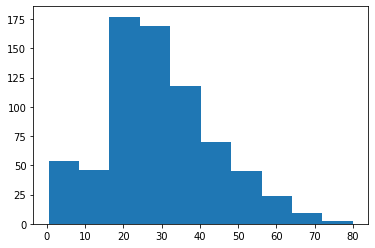

In [ ]:
plt.hist(data['Age'])
plt.show()

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode)
data.drop('Cabin',inplace=True,axis=1)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

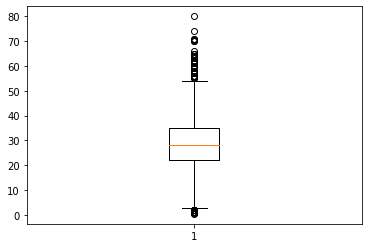

In [ ]:
plt.boxplot(data['Age'])
plt.show()

In [ ]:
#Find 25 percentile,50 percentile and 75 percentile values
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

22.0 28.0 35.0


In [ ]:
data['Age'].median()

28.0

In [ ]:
#Interquartile range
IQR=Q3-Q1
IQR

13.0

In [ ]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

2.5
54.5


In [ ]:
ind=data[(data['Age']>54.5) | (data['Age']<2.5)].index
ind


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [ ]:
#dropping indexes which have values above and below the limits
data.drop(ind,inplace=True)

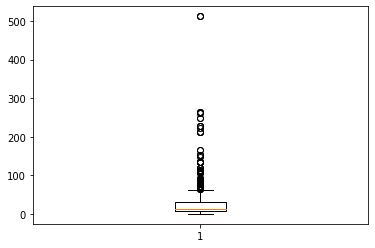

In [ ]:
plt.boxplot(data['Fare'])
plt.show()

In [ ]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

7.8958 13.4167 30.0708


In [ ]:
data['Fare'].median()

13.4167

In [ ]:
IQR=Q3-Q1
IQR

22.174999999999997

In [ ]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-25.366699999999994
63.333299999999994


In [ ]:
ind=data[data['Fare']>65.6344].index
ind

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=104)

In [ ]:
data.drop(ind,inplace=True)

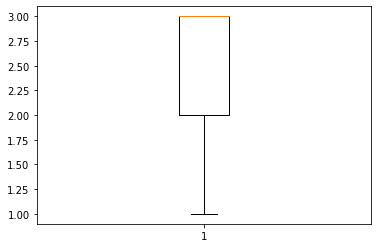

In [ ]:
plt.boxplot(data['Pclass'])
plt.show()

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [ ]:
#No outliers for Pclass

***SVM MODEL***

In [ ]:
#USING SVM
from sklearn.svm import SVC
#Creating instanceof SVC
s=SVC(kernel='linear')
#Splitting data into target and features
X=data.drop('Survived',axis=1)
Y=data['Survived']


In [ ]:
#For Scaling we should consider only real numerical values.So dropping categoricaland non numerical values
X=X.drop(['Name', 'Sex','Ticket','Embarked'],axis=1)
X
# performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
#fitting into model and predicting
s=s.fit(X_train,Y_train)
s_predict=s.predict(X_test)


***KFOLD***

In [ ]:
from sklearn.model_selection import KFold
k_fold=KFold(10)
for train_index,test_index in k_fold.split(X,Y):
  print("Train index",train_index)
  print("Test index",test_index)

Train index [ 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 31

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(s,X,Y,cv=k_fold)
cv_result

array([0.5890411 , 0.69444444, 0.72222222, 0.54166667, 0.68055556,
       0.75      , 0.72222222, 0.77777778, 0.73611111, 0.76388889])

In [ ]:
np.mean(cv_result)

0.69779299847793

***STRATIFIED K FOLD***

In [ ]:
from sklearn.model_selection import StratifiedKFold
s_fold=StratifiedKFold(n_splits=10)
for train_index,test_index in s_fold.split(X,Y):
  print("Train index",train_index)
  print("Test index",test_index)

Train index [ 60  64  66  67  69  70  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 31

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result2=cross_val_score(s,X,Y,cv=s_fold)
cv_result2

array([0.64383562, 0.63888889, 0.72222222, 0.61111111, 0.68055556,
       0.73611111, 0.72222222, 0.79166667, 0.70833333, 0.72222222])

In [ ]:
np.mean(cv_result2)

0.6977168949771689

***CREATING KNN MODEL***

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Steps to find optimum k value
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,Y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(Y_test,y_pred_kNN)
  metric_k.append(acc)
metric_k

[0.6896551724137931,
 0.6827586206896552,
 0.7034482758620689,
 0.6758620689655173,
 0.6758620689655173,
 0.7034482758620689,
 0.6482758620689655,
 0.6689655172413793,
 0.6689655172413793,
 0.7172413793103448,
 0.7034482758620689,
 0.7241379310344828,
 0.7172413793103448,
 0.7310344827586207,
 0.7241379310344828]

Text(0.5, 0, 'accuracy')

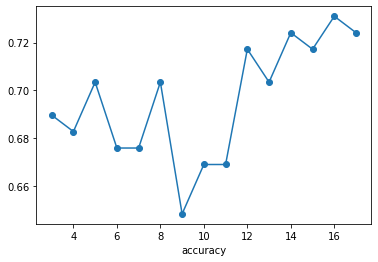

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.xlabel('accuracy')

In [ ]:
#highest accuracy k value is 16
classifier=KNeighborsClassifier(n_neighbors=16)
classifier=classifier.fit(X_train,Y_train)
y_pred_kNN=classifier.predict(X_test)
  

***KFOLD***

In [ ]:
from sklearn.model_selection import KFold
k_fold=KFold(10)
for train_index,test_index in k_fold.split(X,Y):
  print("Train index",train_index)
  print("Test index",test_index)


Train index [ 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 31

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result3=cross_val_score(classifier,X,Y,cv=k_fold)
np.mean(cv_result3)

0.6909246575342465

***STRATIFIED K FOLD***

In [ ]:
from sklearn.model_selection import StratifiedKFold
s_fold=StratifiedKFold(n_splits=10)
for train_index,test_index in s_fold.split(X,Y):
  print("Train index",train_index)
  print("Test index",test_index)

Train index [ 60  64  66  67  69  70  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 31

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result4=cross_val_score(classifier,X,Y,cv=s_fold)
np.mean(cv_result4)

0.693607305936073